# 고객 대출등급 분류 해커톤

In [3]:
import pandas as pd
import numpy as np

In [24]:
sample_submission = pd.read_csv('./data/sample_submission.csv')
sample_submission.head()

,ID,대출등급
0,TEST_00000,G
1,TEST_00001,G
2,TEST_00002,G
3,TEST_00003,G
4,TEST_00004,G


In [3]:
raw_data = pd.read_csv('./data/train.csv')
raw_data.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [4]:
raw_data['대출등급'].value_counts()

대출등급
B    28817
C    27623
A    16772
D    13354
E     7354
F     1954
G      420
Name: count, dtype: int64

C:\Users\wisei\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wisei\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wisei\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wisei\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


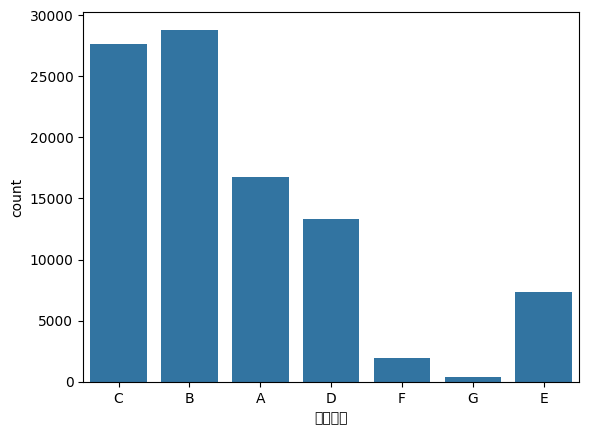

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='대출등급', data=raw_data)
plt.show()

# 전처리

In [6]:
raw_data['대출기간'].unique() # 3년, 5년 

array([' 36 months', ' 60 months'], dtype=object)

In [7]:
raw_data['근로기간'].unique()

array(['6 years', '10+ years', '5 years', '8 years', 'Unknown', '9 years',
       '2 years', '1 year', '3 years', '7 years', '4 years', '< 1 year',
       '10+years', '<1 year', '3', '1 years'], dtype=object)

In [8]:
raw_data['주택소유상태'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'ANY'], dtype=object)

In [9]:
raw_data['대출목적'].unique() # 3년, 5년 

array(['부채 통합', '주택 개선', '주요 구매', '휴가', '의료', '자동차', '신용 카드', '소규모 사업',
       '기타', '이사', '주택', '재생 에너지'], dtype=object)

---

1. 대출기간 숫자로
2. 근로기간 숫자로
3. 주택소유 ont-hot encoding
4. 대출목적 ont-hot encoding

---

In [10]:
import pandas as pd

raw_data['대출기간'] = raw_data['대출기간'].map({' 36 months': 3, ' 60 months': 5})

# 결과 확인
raw_data['대출기간']

0        3
1        5
2        3
3        3
4        5
        ..
96289    3
96290    5
96291    3
96292    3
96293    3
Name: 대출기간, Length: 96294, dtype: int64

array(['6 years', '10+ years', '5 years', '8 years', 'Unknown', '9 years',
       '2 years', '1 year', '3 years', '7 years', '4 years', '< 1 year',
       '10+years', '<1 year', '3', '1 years'], dtype=object)

In [82]:
raw_data['근로기간'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
96289    False
96290    False
96291    False
96292    False
96293    False
Name: 근로기간, Length: 96294, dtype: bool

In [81]:
raw_data[raw_data['근로기간'].isnull()]

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급


In [11]:
import pandas as pd
import numpy as np

# 데이터프레임에서 '근로기간' 열 선택
raw_data['근로기간'] = raw_data['근로기간'].replace(['Unknown'], np.nan)

# '< 1 year'을 0으로 대체
raw_data['근로기간'].replace('< 1', 0, inplace=True)
raw_data['근로기간'].replace('< 1 year', 0, inplace=True)
raw_data['근로기간'].replace('<1 year', 0, inplace=True)

# '10+ years' 또는 '10+years'를 10으로 대체
raw_data['근로기간'].replace('10+', 10, inplace=True)
raw_data['근로기간'].replace('10+years', 10, inplace=True)
raw_data['근로기간'].replace('10+ years', 10, inplace=True)

# years 삭제하고 숫자로 표현
raw_data['근로기간'] = pd.to_numeric(raw_data['근로기간'].astype(str).str.replace(' years', '').str.extract('(\d+)', expand=False).fillna(0))

# 결과 확인
print(raw_data['근로기간'].unique())

[ 6 10  5  8  0  9  2  1  3  7  4]


In [16]:
raw_data.drop('ID', axis=1, inplace=True)

In [17]:
raw_data.head()

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,12480000,3,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,14400000,5,10,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,12000000,3,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,14400000,3,8,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,18000000,5,0,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [18]:
raw_data_copy = raw_data.copy()

In [19]:
# '주택소유상태' 열에 대한 원-핫 인코딩
raw_data_copy = pd.get_dummies(raw_data_copy, columns=['주택소유상태'], prefix='주택소유상태')
raw_data_copy.head()

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,주택소유상태_ANY,주택소유상태_MORTGAGE,주택소유상태_OWN,주택소유상태_RENT
0,12480000,3,6,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,False,False,False,True
1,14400000,5,10,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,False,True,False,False
2,12000000,3,5,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,False,True,False,False
3,14400000,3,8,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C,False,True,False,False
4,18000000,5,0,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,False,False,False,True


In [20]:
# '대출목적' 열에 대한 원-핫 인코딩
raw_data_copy = pd.get_dummies(raw_data_copy, columns=['대출목적'], prefix='대출목적')
raw_data_copy.head()

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,...,대출목적_소규모 사업,대출목적_신용 카드,대출목적_의료,대출목적_이사,대출목적_자동차,대출목적_재생 에너지,대출목적_주요 구매,대출목적_주택,대출목적_주택 개선,대출목적_휴가
0,12480000,3,6,72000000,18.90,15,0,0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,14400000,5,10,130800000,22.33,21,0,373572,234060.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,12000000,3,5,96000000,8.60,14,0,928644,151944.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,14400000,3,8,132000000,15.09,15,0,325824,153108.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,18000000,5,0,71736000,25.39,19,0,228540,148956.0,0.0,...,False,False,False,False,False,False,True,False,False,False


In [21]:
raw_data_copy.columns

Index(['대출금액', '대출기간', '근로기간', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수',
       '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급', '주택소유상태_ANY',
       '주택소유상태_MORTGAGE', '주택소유상태_OWN', '주택소유상태_RENT', '대출목적_기타', '대출목적_부채 통합',
       '대출목적_소규모 사업', '대출목적_신용 카드', '대출목적_의료', '대출목적_이사', '대출목적_자동차',
       '대출목적_재생 에너지', '대출목적_주요 구매', '대출목적_주택', '대출목적_주택 개선', '대출목적_휴가'],
      dtype='object')

In [15]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)
from sklearn.metrics import confusion_matrix

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    return acc, pre, re, f1, auc

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    
    print('-> confusion matrix')
    print(confusion)
    print('====')
    
    print('accuracy: {0:.4f}, precision: {1:.4f}'.format(acc, pre))
    print('recall: {0:.4f}, F1: {1:.4f}, auc:{2:.4f}'.format(re, f1, auc))

# 데이터 분리

In [44]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(raw_data_copy['대출등급'])

X = raw_data_copy.drop('대출등급', axis=1)
X.shape, y.shape

((96294, 27), (96294,))

# lightgbm

In [49]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# Assuming you have defined X_train, X_test, y_train, y_test

lgbm = LGBMClassifier()

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2]
    # Add other hyperparameters as needed
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1453
[LightGBM] [Info] Number of data points in the train set: 44936, number of used features: 26
[LightGBM] [Info] Start training from score -1.747788
[LightGBM] [Info] Start training from score -1.206483
[LightGBM] [Info] Start training from score -1.248710
[LightGBM] [Info] Start training from score -1.975542
[LightGBM] [Info] Start training from score -2.572096
[LightGBM] [Info] Start training from score -3.897355
[LightGBM] [Info] Start training from score -5.434880
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] 

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [50]:
# Access the best estimator
best_lgbm_model = grid_search.best_estimator_

# Now you can use the best model for predictions
accuracy = accuracy_score(y_test, best_lgbm_model.predict(X_test))
print('Accuracy:', accuracy)

Accuracy: 0.8592543874831251


In [64]:
predictions = best_lgbm_model.predict(X_test)

In [65]:
decoded_predictions = label_encoder.inverse_transform(predictions.astype(int))
decoded_predictions

array(['B', 'D', 'C', ..., 'D', 'B', 'C'], dtype=object)

# 모델 저장 (잘못된 코드)

In [52]:
# Assuming you have trained your LightGBM model (lgb_model)
lgb_model.save_model('lgbm_model.txt')

# 모델 로드

In [53]:
loaded_model = lgb.Booster(model_file='lgbm_model.txt')

# Now you can use loaded_model for predictions
predictions = loaded_model.predict(X_test)

In [58]:
predictions

array([0.95047103, 0.99997735, 0.99983035, ..., 0.99999842, 0.976617  ,
       0.99998472])

In [62]:
decoded_predictions = label_encoder.inverse_transform(predictions.astype(int))
decoded_predictions

array(['A', 'A', 'A', ..., 'A', 'A', 'A'], dtype=object)

# 테스트 데이터

In [71]:
raw_data_test = pd.read_csv('./data/test.csv')
raw_data_test.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,TEST_00000,16800000,36 months,8 years,MORTGAGE,132000000,19.64,12,주택 개선,0,394692,146604.0,0.0,0.0
1,TEST_00001,8400000,36 months,5 years,RENT,89971200,15.84,25,부채 통합,0,0,0.0,0.0,0.0
2,TEST_00002,17280000,36 months,6 years,RENT,150000000,8.41,20,신용 카드,0,1786980,281820.0,0.0,0.0
3,TEST_00003,14400000,36 months,5 years,MORTGAGE,66000000,13.72,30,신용 카드,1,669024,281724.0,0.0,0.0
4,TEST_00004,27600000,36 months,5 years,RENT,55200000,30.50,12,신용 카드,0,1250052,614844.0,0.0,0.0


In [74]:
raw_data.columns

Index(['대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수', '대출목적',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급'],
      dtype='object')

In [72]:
raw_data_test.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수'],
      dtype='object')

---

In [75]:
raw_data['주택소유상태'].value_counts()

주택소유상태
MORTGAGE    47934
RENT        37705
OWN         10654
ANY             1
Name: count, dtype: int64

In [76]:
raw_data_test['주택소유상태'].value_counts()

주택소유상태
MORTGAGE    31739
RENT        25281
OWN          7177
Name: count, dtype: int64

In [77]:
raw_data['대출목적'].value_counts()

대출목적
부채 통합     55150
신용 카드     24500
주택 개선      6160
기타         4725
주요 구매      1803
의료         1039
자동차         797
소규모 사업      787
이사          506
휴가          466
주택          301
재생 에너지       60
Name: count, dtype: int64

In [78]:
raw_data_test['대출목적'].value_counts()

대출목적
부채 통합     37054
신용 카드     16204
주택 개선      4019
기타         3032
주요 구매      1244
의료          696
소규모 사업      541
자동차         536
이사          362
휴가          294
주택          185
재생 에너지       29
결혼            1
Name: count, dtype: int64

In [56]:
import pandas as pd
import numpy as np
import pandas as pd

raw_data_test['대출기간'] = raw_data_test['대출기간'].map({' 36 months': 3, ' 60 months': 5})

# 데이터프레임에서 '근로기간' 열 선택
raw_data_test['근로기간'] = raw_data_test['근로기간'].replace(['Unknown'], np.nan)

# '< 1 year'을 0으로 대체
raw_data_test['근로기간'].replace('< 1', 0, inplace=True)
raw_data_test['근로기간'].replace('< 1 year', 0, inplace=True)
raw_data_test['근로기간'].replace('<1 year', 0, inplace=True)

# '10+ years' 또는 '10+years'를 10으로 대체
raw_data_test['근로기간'].replace('10+', 10, inplace=True)
raw_data_test['근로기간'].replace('10+years', 10, inplace=True)
raw_data_test['근로기간'].replace('10+ years', 10, inplace=True)

# years 삭제하고 숫자로 표현
raw_data_test['근로기간'] = pd.to_numeric(raw_data_test['근로기간'].astype(str).str.replace(' years', '').str.extract('(\d+)', expand=False).fillna(0))

# '주택소유상태' 열에 대한 원-핫 인코딩
raw_data_test = pd.get_dummies(raw_data_test, columns=['주택소유상태'], prefix='주택소유상태')
raw_data_copy.head()

# '대출목적' 열에 대한 원-핫 인코딩
raw_data_test = pd.get_dummies(raw_data_test, columns=['대출목적'], prefix='대출목적')

[ 8  5  6  0 10  3  1  7  4  2  9]


In [70]:
predictions = best_lgbm_model.predict(raw_data_test)
decoded_predictions = label_encoder.inverse_transform(predictions.astype(int))
decoded_predictions

ValueError: Number of features of the model must match the input. Model n_features_ is 27 and input n_features is 28

# 원핫인코딩 문제 때문에 다시 다시

In [4]:
raw_train = pd.read_csv('./data/train.csv')
raw_test = pd.read_csv('./data/test.csv')
print(raw_train.shape, raw_test.shape)

(96294, 15) (64197, 14)


In [5]:
raw_data = pd.concat([raw_train, raw_test])
raw_data.shape

(160491, 15)

In [6]:
import pandas as pd
import numpy as np
import pandas as pd

raw_data['대출기간'] = raw_data['대출기간'].map({' 36 months': 3, ' 60 months': 5})

# 데이터프레임에서 '근로기간' 열 선택
raw_data['근로기간'] = raw_data['근로기간'].replace(['Unknown'], np.nan)

# '< 1 year'을 0으로 대체
raw_data['근로기간'].replace('< 1', 0, inplace=True)
raw_data['근로기간'].replace('< 1 year', 0, inplace=True)
raw_data['근로기간'].replace('<1 year', 0, inplace=True)

# '10+ years' 또는 '10+years'를 10으로 대체
raw_data['근로기간'].replace('10+', 10, inplace=True)
raw_data['근로기간'].replace('10+years', 10, inplace=True)
raw_data['근로기간'].replace('10+ years', 10, inplace=True)

# years 삭제하고 숫자로 표현
raw_data['근로기간'] = pd.to_numeric(raw_data['근로기간'].astype(str).str.replace(' years', '').str.extract('(\d+)', expand=False).fillna(0))

# '주택소유상태' 열에 대한 원-핫 인코딩
raw_data = pd.get_dummies(raw_data, columns=['주택소유상태'], prefix='주택소유상태')
raw_data.head()

# '대출목적' 열에 대한 원-핫 인코딩
raw_data = pd.get_dummies(raw_data, columns=['대출목적'], prefix='대출목적')
raw_data.head()

,ID,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,...,대출목적_소규모 사업,대출목적_신용 카드,대출목적_의료,대출목적_이사,대출목적_자동차,대출목적_재생 에너지,대출목적_주요 구매,대출목적_주택,대출목적_주택 개선,대출목적_휴가
0,TRAIN_00000,12480000,3,6,72000000,18.90,15,0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,TRAIN_00001,14400000,5,10,130800000,22.33,21,0,373572,234060.0,...,False,False,False,False,False,False,False,False,True,False
2,TRAIN_00002,12000000,3,5,96000000,8.60,14,0,928644,151944.0,...,False,False,False,False,False,False,False,False,False,False
3,TRAIN_00003,14400000,3,8,132000000,15.09,15,0,325824,153108.0,...,False,False,False,False,False,False,False,False,False,False
4,TRAIN_00004,18000000,5,0,71736000,25.39,19,0,228540,148956.0,...,False,False,False,False,False,False,True,False,False,False


### train, test 다시 쪼개기

In [7]:
raw_data.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급',
       '주택소유상태_ANY', '주택소유상태_MORTGAGE', '주택소유상태_OWN', '주택소유상태_RENT', '대출목적_결혼',
       '대출목적_기타', '대출목적_부채 통합', '대출목적_소규모 사업', '대출목적_신용 카드', '대출목적_의료',
       '대출목적_이사', '대출목적_자동차', '대출목적_재생 에너지', '대출목적_주요 구매', '대출목적_주택',
       '대출목적_주택 개선', '대출목적_휴가'],
      dtype='object')

In [8]:
onehot_train = raw_data.iloc[:96294,:]
onehot_test = raw_data.iloc[96294:,:]
print(onehot_train.shape, onehot_test.shape)

(96294, 30) (64197, 30)


### onehot_train 데이터로 모델학습

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(onehot_train['대출등급'])

X = onehot_train.drop(['대출등급', 'ID'], axis=1)
X.shape, y.shape

((96294, 28), (96294,))

In [10]:
X.columns

Index(['대출금액', '대출기간', '근로기간', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수',
       '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '주택소유상태_ANY', '주택소유상태_MORTGAGE',
       '주택소유상태_OWN', '주택소유상태_RENT', '대출목적_결혼', '대출목적_기타', '대출목적_부채 통합',
       '대출목적_소규모 사업', '대출목적_신용 카드', '대출목적_의료', '대출목적_이사', '대출목적_자동차',
       '대출목적_재생 에너지', '대출목적_주요 구매', '대출목적_주택', '대출목적_주택 개선', '대출목적_휴가'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

### lightGBM

In [13]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# Assuming you have defined X_train, X_test, y_train, y_test

lgbm = LGBMClassifier()

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2]
    # Add other hyperparameters as needed
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002757 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1453
[LightGBM] [Info] Number of data points in the train set: 44936, number of used features: 26
[LightGBM] [Info] Start training from score -1.747788
[LightGBM] [Info] Start training from score -1.206483
[LightGBM] [Info] Start training from score -1.248710
[LightGBM] [Info] Start training from score -1.975542
[LightGBM] [Info] Start training from score -2.572096
[LightGBM] [Info] Start training from score -3.897355
[LightGBM] [Info] Start training from score -5.434880
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002681 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] 

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [16]:
# Access the best estimator
best_lgbm_model = grid_search.best_estimator_

# Now you can use the best model for predictions
accuracy = accuracy_score(y_test, best_lgbm_model.predict(X_test))
print('Accuracy:', accuracy)

Accuracy: 0.8592543874831251


In [17]:
predictions = best_lgbm_model.predict(X_test)
decoded_predictions = label_encoder.inverse_transform(predictions.astype(int))
decoded_predictions

array(['B', 'D', 'C', ..., 'D', 'B', 'C'], dtype=object)

In [18]:
onehot_test.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급',
       '주택소유상태_ANY', '주택소유상태_MORTGAGE', '주택소유상태_OWN', '주택소유상태_RENT', '대출목적_결혼',
       '대출목적_기타', '대출목적_부채 통합', '대출목적_소규모 사업', '대출목적_신용 카드', '대출목적_의료',
       '대출목적_이사', '대출목적_자동차', '대출목적_재생 에너지', '대출목적_주요 구매', '대출목적_주택',
       '대출목적_주택 개선', '대출목적_휴가'],
      dtype='object')

In [20]:
test_data = onehot_test.drop(['대출등급', 'ID'], axis=1)
test_data.shape

(64197, 28)

In [21]:
predictions = best_lgbm_model.predict(test_data)
decoded_predictions = label_encoder.inverse_transform(predictions.astype(int))
decoded_predictions

array(['B', 'B', 'A', ..., 'D', 'C', 'A'], dtype=object)

In [23]:
onehot_test['ID']

0        TEST_00000
1        TEST_00001
2        TEST_00002
3        TEST_00003
4        TEST_00004
            ...    
64192    TEST_64192
64193    TEST_64193
64194    TEST_64194
64195    TEST_64195
64196    TEST_64196
Name: ID, Length: 64197, dtype: object

In [26]:
result = pd.DataFrame()
result['ID'] = onehot_test['ID']
result['대출등급'] = decoded_predictions


,ID,대출등급
0,TEST_00000,B
1,TEST_00001,B
2,TEST_00002,A
3,TEST_00003,C
4,TEST_00004,C


In [29]:
result.to_csv('result_submission.csv', index=False, encoding='utf-8')

In [31]:
sample_submission = pd.read_csv('result_submission.csv')
sample_submission.head()

,ID,대출등급
0,TEST_00000,B
1,TEST_00001,B
2,TEST_00002,A
3,TEST_00003,C
4,TEST_00004,C
